Importa los datos del archivo “Calificaciones.csv” a tu ambiente de trabajo. Este archivo lo encontrarás en la misma página donde descargaste esta plantilla. Imprime en consola el tipo de dato de cada variable del data frame.

In [45]:
import pandas as pd
data = pd.read_csv("Calificaciones.csv")
data.dtypes

,0
Escuela,object
Sexo,object
Edad,int64
HorasDeEstudio,int64
Reprobadas,int64
Internet,object
Faltas,int64
G1,int64
G2,int64
G3,int64


Transforma todas las variables categóricas, de forma que los nuevos datos sean útiles para generar un modelo de regresión lineal múltiple. Presta especial atención a variables que, aunque parecen cuantitativas (contienen números), realmente son cualitativas (los números representan una clase). Imprime las primeras 5 observaciones de la base de datos modificada, demostrando que las variables cualitativas desaparecieron y fueron reemplazadas por variables adecuadas.

In [46]:
import pandas as pd
categorical_vars = data.select_dtypes(include=['object']).columns.tolist()

potential_categorical = []
threshold = 5  # Si tienen menos de 5 valores unicos, se tratan como categorias

for col in data.select_dtypes(include=['int64', 'float64']).columns:
    unique_values = data[col].nunique()
    if unique_values < threshold:
        potential_categorical.append(col)

for var in potential_categorical:
    data[var] = data[var].astype(str)

categorical_vars.extend(potential_categorical)

for var in categorical_vars:
    print(f"\nConteo de valores para '{var}':")
    print(data[var].value_counts())
    print("-" * 50)

data = pd.get_dummies(data, columns=categorical_vars, drop_first=True)

print("\nDatos transformados:")
print(data.head())



Conteo de valores para 'Escuela':
Escuela
GP    349
MS     46
Name: count, dtype: int64
--------------------------------------------------

Conteo de valores para 'Sexo':
Sexo
F    208
M    187
Name: count, dtype: int64
--------------------------------------------------

Conteo de valores para 'Internet':
Internet
yes    329
no      66
Name: count, dtype: int64
--------------------------------------------------

Conteo de valores para 'HorasDeEstudio':
HorasDeEstudio
2    198
1    105
3     65
4     27
Name: count, dtype: int64
--------------------------------------------------

Conteo de valores para 'Reprobadas':
Reprobadas
0    312
1     50
2     17
3     16
Name: count, dtype: int64
--------------------------------------------------

Datos transformados:
   Edad  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  Internet_yes  \
0    18       6   5   6   6       False   False         False   
1    17       4   5   5   6       False   False          True   
2    15      10   7   8  10       F

Identifica valores atípicos para la variable “Faltas”, utilizando el método de Tukey con k=3. Imprime en consola todas las observaciones que se consideren atípicas, y tras revisar las características de dichas observaciones, agrega una línea de texto que describa qué planeas hacer con dichos valores y por qué. Realiza la acción descrita en caso de ser necesario.

In [47]:
import numpy as np

q1 = np.quantile(data['Faltas'].dropna(), 0.25)  # 1er cuartil (25%)
q3 = np.quantile(data['Faltas'].dropna(), 0.75)  # 3er cuartil (75%)
iqr = q3 - q1  # Rango intercuartílico
lower_bound = q1 - 3 * iqr
upper_bound = q3 + 3 * iqr

outliers = data[(data['Faltas'] < lower_bound) | (data['Faltas'] > upper_bound)]

print(f"\nValores atípicos detectados en 'Faltas' usando el método de Tukey (k=3):")
print(outliers)



Valores atípicos detectados en 'Faltas' usando el método de Tukey (k=3):
     Edad  Faltas  G1  G2  G3  Escuela_MS  Sexo_M  Internet_yes  \
74     16      54  11  12  11       False   False          True   
183    17      56   9   9   8       False   False          True   
276    18      75  10   9   9       False   False          True   
307    19      38   8   9   8       False    True          True   
315    19      40  13  11  11       False   False          True   

     HorasDeEstudio_2  HorasDeEstudio_3  HorasDeEstudio_4  Reprobadas_1  \
74               True             False             False         False   
183              True             False             False         False   
276              True             False             False         False   
307             False             False             False          True   
315             False              True             False          True   

     Reprobadas_2  Reprobadas_3  
74          False         False  
183 

In [48]:
median_value = data['Faltas'].median()
data.loc[outliers.index, 'Faltas'] = median_value

outliers = data[(data['Faltas'] < lower_bound) | (data['Faltas'] > upper_bound)]

print(f"\nValores atípicos detectados en 'Faltas' usando el método de Tukey (k=3):")
print(outliers) # Lo vuelvo a imprimir para verificar que esté vacío


Valores atípicos detectados en 'Faltas' usando el método de Tukey (k=3):
Empty DataFrame
Columns: [Edad, Faltas, G1, G2, G3, Escuela_MS, Sexo_M, Internet_yes, HorasDeEstudio_2, HorasDeEstudio_3, HorasDeEstudio_4, Reprobadas_1, Reprobadas_2, Reprobadas_3]
Index: []


***Se utilizó la mediana para reemplazar los valores atípicos en la variable "Faltas", ya que es una medida robusta que no se ve afectada por valores extremos. En lugar de eliminar estos datos y reducir el tamaño de la muestra, se optó por la mediana para mantener la información y evitar que los valores extremos distorsionen el análisis.***

Genera una matriz de correlaciones para encontrar potenciales problemas de colinealidad. Genera un heatmap para visualizar de forma más sencilla los resultados. Determina si es necesario eliminar una o múltiples variables, explicando tu razonamiento en una línea de texto. Realiza la acción descrita en caso de ser necesario.

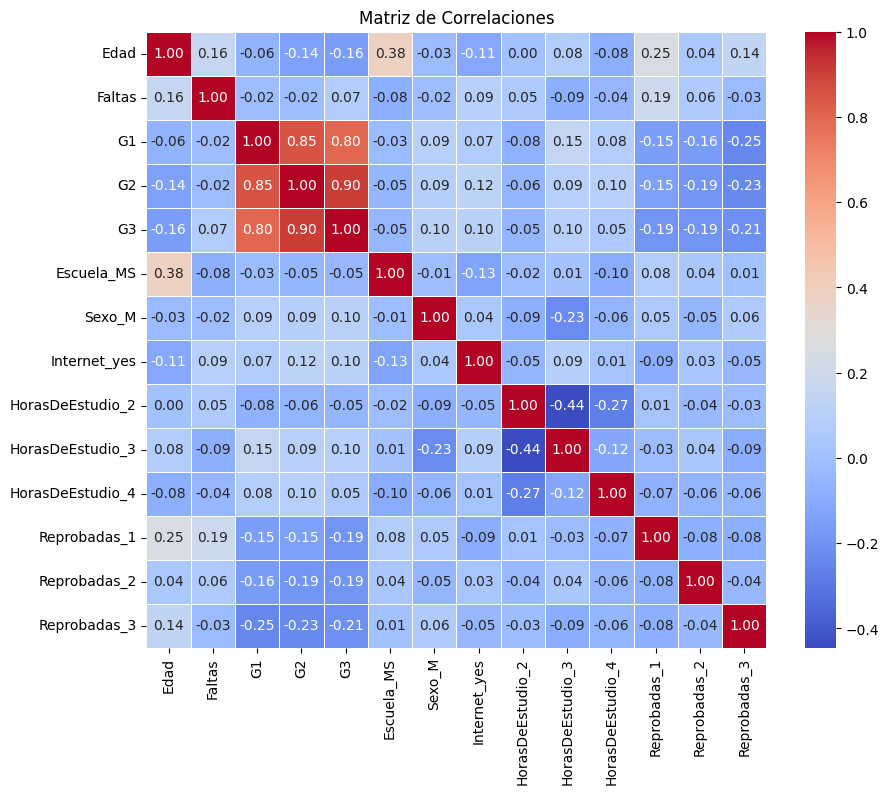

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlaciones")
plt.show()

***La correlación que hay entre G1-G2, G2-G3, G1-G3 es muy alta, por lo que siento que sería bueno eliminar 2 de las 3 variables, como G1 y G2 son de los primeros parciales, prefiero quedarme con la tercera que es la calificación final ya que creo que es más significativa. Las eliminaré y volveré a realizar el mapa de correlación para ver si disminuye.***

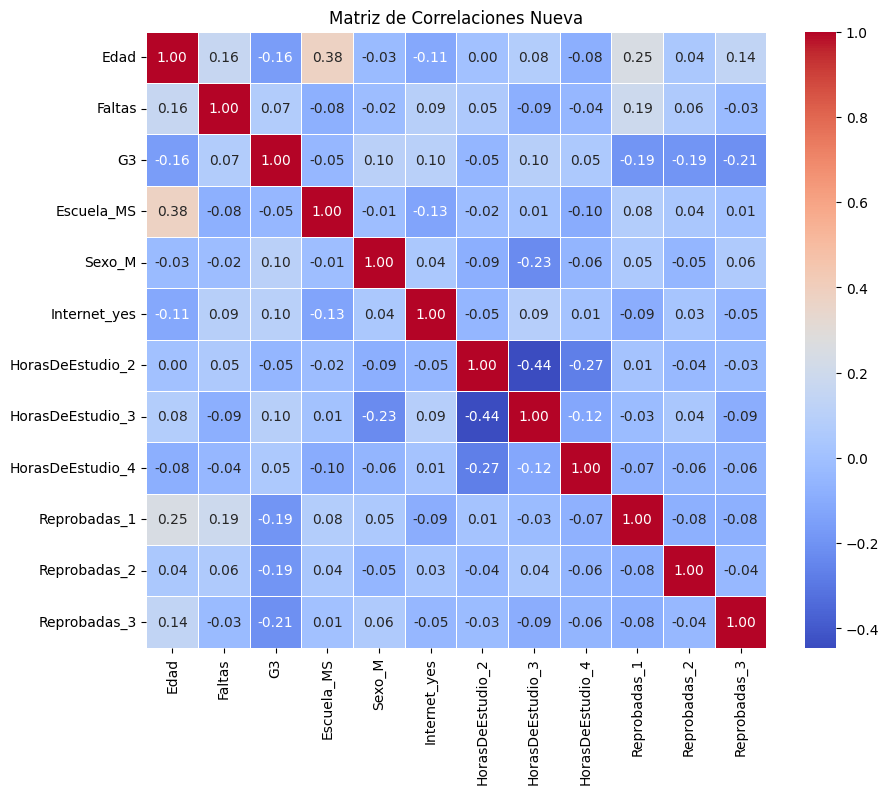

In [50]:
# Eliminar G1 y G2 por alta correlación con G3
data.drop(columns=['G1', 'G2'], inplace=True)

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlaciones Nueva")
plt.show()

***Como podemos darnos cuenta, ya no tenemos ninguna correlación muy grande en nuestra matriz :)***

Incluye términos de interacción para al menos dos pares de variables, las que te llame más la atención analizar con esta metodología. Trata de evitar incluir interacciones para todos los pares de variables posibles. Imprime en consola las primeras 5 observaciones de la base de datos con los nuevos términos.

In [53]:
data['Faltas_Reprobadas_3'] = data['Faltas'] * data['Reprobadas_3']
data['Internet_HorasDeEstudio_4'] = data['Internet_yes'] * data['HorasDeEstudio_4']

# Imprimir las primeras 5 observaciones con los nuevos términos de interacción
print("\nDatos con términos de interacción:")
print(data.head())


Datos con términos de interacción:
   Edad  Faltas  G3  Escuela_MS  Sexo_M  Internet_yes  HorasDeEstudio_2  \
0    18       6   6       False   False         False              True   
1    17       4   6       False   False          True              True   
2    15      10  10       False   False          True              True   
3    15       2  15       False   False          True             False   
4    16       4  10       False   False         False              True   

   HorasDeEstudio_3  HorasDeEstudio_4  Reprobadas_1  Reprobadas_2  \
0             False             False         False         False   
1             False             False         False         False   
2             False             False         False         False   
3              True             False         False         False   
4             False             False         False         False   

   Reprobadas_3  Faltas_Reprobadas_3  Internet_HorasDeEstudio_4  
0         False                 

***Faltas_Reprobadas_3 : Esta interacción permite evaluar si los estudiantes que acumulan muchas inasistencias tienen una mayor probabilidad de reprobar múltiples materias.***

***Internet_HorasDeEstudio_4 : Esta interacción busca determinar si los estudiantes con internet en casa son más propensos a dedicar largas jornadas de estudio en comparación con quienes no tienen acceso.***

Entrena un modelo de regresión lineal múltiple en un subconjunto de datos que corresponda al 80% de los datos totales e imprime en consola un resumen de los resultados obtenidos. Posteriormente, usando dicho modelo, predice la calificación final del 20% de las observaciones que no se usaron para entrenar. Genera una gráfica de dispersión de las calificaciones finales reales contra las calificaciones finales estimadas por el modelo en los datos de prueba. Agrega una línea de texto donde des una conclusión sobre los resultados del modelo, con base en la información que se muestra en la gráfica.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     6.536
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           5.68e-11
Time:                        05:34:57   Log-Likelihood:                -890.28
No. Observations:                 316   AIC:                             1809.
Df Residuals:                     302   BIC:                             1861.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1721      3.518      4.313      0.0

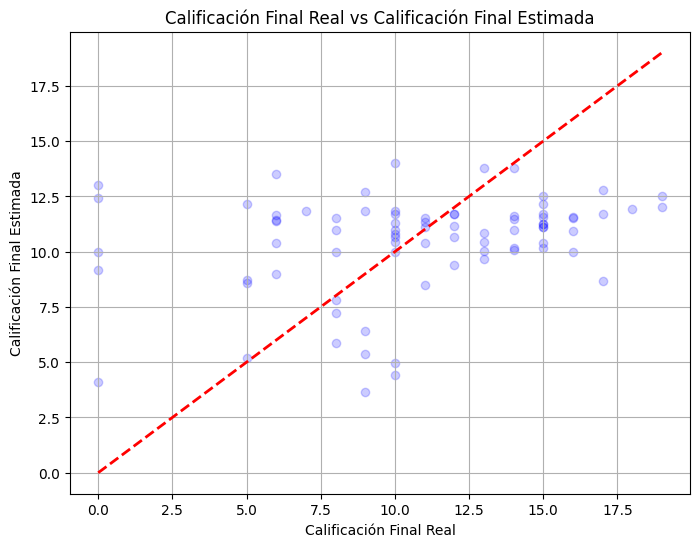

In [54]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

X = data.drop(columns=['G3'])
y = data['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

X_train.head()
X_test.head()

X_train = np.asarray(X_train, dtype=float)
y_train = np.asarray(y_train, dtype=float)
X_test = np.asarray(X_test, dtype=float)
y_test = np.asarray(y_test, dtype=float)

model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

y_pred = results.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title("Calificación Final Real vs Calificación Final Estimada")
plt.xlabel("Calificación Final Real")
plt.ylabel("Calificación Final Estimada")
plt.grid(True)

plt.show()


El modelo de regresión no es muy preciso, ya que solo explica alrededor del 21% de la variabilidad en las calificaciones finales. Esto significa que la mayoría de las diferencias en las calificaciones no se capturan con las variables que estamos usando. Aunque algunas variables son estadísticamente significativas, otras no lo son, lo que sugiere que no todas las características incluidas realmente ayudan a predecir las calificaciones. Además, el modelo tiene un alto margen de error en las predicciones, lo que indica que las estimaciones no son confiables :(